In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size=(256,256),
    batch_size=32
)

Found 2152 files belonging to 3 classes.


In [3]:
class_name = dataset.class_names
class_name

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [4]:
len(dataset)

68

In [5]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 256, 256, 3)
[0 1 0 1 1 1 0 0 0 1 0 1 1 2 1 0 1 1 1 0 0 0 0 0 0 0 0 0 1 1 2 1]


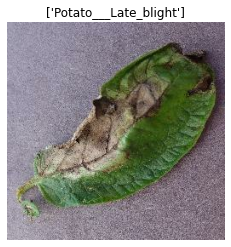

In [6]:
for image_batch, label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype('uint8'))  #this is float we have to convert it into integer
    plt.axis('off')
    plt.title([class_name[label_batch[0]]])

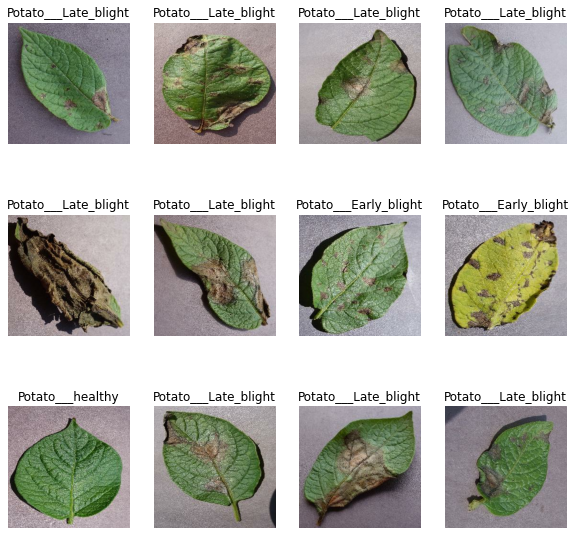

In [7]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4,i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_name[labels_batch[i]])
        plt.axis("off")

In [ ]:
'''
80% ----> Training
20% ----> 10% ----> Validation
          10% ----> Test
'''

In [8]:
len(dataset) * 0.8

54.400000000000006

In [9]:
train_ds = dataset.take(54)
len(train_ds)

54

In [10]:
remaining_ds = dataset.skip(54)
len(remaining_ds)

14

In [11]:
val_ds = remaining_ds.take(7)
len(val_ds)

7

In [12]:
test_ds = remaining_ds.skip(7)
len(test_ds)

7

In [13]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [14]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(256, 256),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [15]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [16]:
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=(32,256,256,3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax'),
])

model.build(input_shape=(32,256,256,3))

In [17]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [18]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [19]:
history = model.fit(
    train_ds,
    batch_size=32,
    validation_data=val_ds,
    verbose=1,
    epochs=25,
)

Epoch 1/25
54/54 [==============================] - 28s 349ms/step - loss: 0.8915 - accuracy: 0.5301 - val_loss: 0.6938 - val_accuracy: 0.7321
Epoch 2/25
54/54 [==============================] - 17s 320ms/step - loss: 0.6627 - accuracy: 0.7182 - val_loss: 0.8437 - val_accuracy: 0.7500
Epoch 3/25
54/54 [==============================] - 17s 320ms/step - loss: 0.4153 - accuracy: 0.8241 - val_loss: 0.3109 - val_accuracy: 0.8571
Epoch 4/25
54/54 [==============================] - 18s 325ms/step - loss: 0.2766 - accuracy: 0.8941 - val_loss: 0.3943 - val_accuracy: 0.8393
Epoch 5/25
54/54 [==============================] - 18s 330ms/step - loss: 0.2341 - accuracy: 0.9045 - val_loss: 0.3281 - val_accuracy: 0.8661
Epoch 6/25
54/54 [==============================] - 18s 329ms/step - loss: 0.2241 - accuracy: 0.9115 - val_loss: 0.2672 - val_accuracy: 0.9018
Epoch 7/25
54/54 [==============================] - 18s 331ms/step - loss: 0.1828 - accuracy: 0.9311 - val_loss: 0.2038 - val_accuracy: 0.9062

In [20]:
score = model.evaluate(test_ds)

7/7 [==============================] - 3s 157ms/step - loss: 0.0567 - accuracy: 0.9800


In [22]:
score

[0.0566512793302536, 0.9800000190734863]

In [23]:
history.params

{'verbose': 1, 'epochs': 25, 'steps': 54}

In [24]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

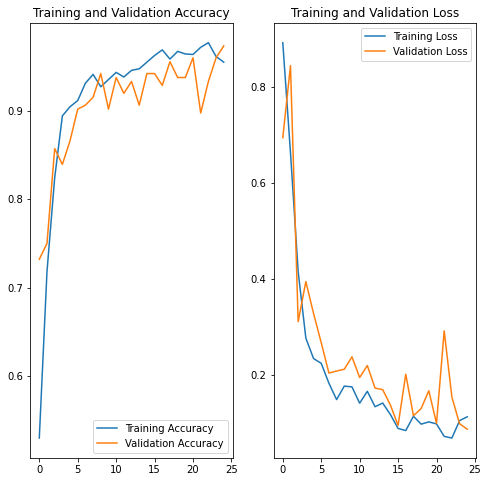

In [30]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [41]:
model.save("potatoes.h5")